<a href="https://colab.research.google.com/github/kelseymatsik/project_chd/blob/main/tori_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### GOAL: Build predictive algorithms that predict the likelihood a person develops coronary heart disease (CHD).

In [1213]:
! git clone https://github.com/kelseymatsik/project_chd

fatal: destination path 'project_chd' already exists and is not an empty directory.


In [1214]:
import pandas as pd
import numpy as np

In [1215]:
df = pd.read_csv("./project_chd/fhs_train.csv")
df.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,2050,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,NaN,0
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0


In [1216]:
# Renaming columns to be more intuitive
df = df.rename(columns = {'prevalentStroke': 'stroke',
                          'prevalentHyp': 'hypertensive',
                          'TenYearCHD': 'tenYearRisk',
                          'cigsPerDay': 'currentSmoker', # Note: Looking at the value counts and data dictionary for these values, we realized that they should be switched
                          'currentSmoker': 'cigsPerDay'}
                          )

# Dropping 'Unnamed: 0' column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [1217]:
df.head()

,sex,age,education,cigsPerDay,currentSmoker,BPMeds,stroke,hypertensive,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,tenYearRisk
0,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,NaN,0
3,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0


In [1218]:
df.columns

Index(['sex', 'age', 'education', 'cigsPerDay', 'currentSmoker', 'BPMeds',
       'stroke', 'hypertensive', 'diabetes', 'totChol', 'sysBP', 'diaBP',
       'BMI', 'heartRate', 'glucose', 'tenYearRisk'],
      dtype='object')

In [1219]:
# Setting up temporary variables
sex = df['sex']
age = df['age']
education = df['education']
currentSmoker = df['currentSmoker']
cigsPerDay = df['cigsPerDay']
BPMeds = df['BPMeds']
stroke = df['stroke']
hypertensive = df['hypertensive']
diabetes = df['diabetes']
totChol = df['totChol']
sysBP = df['sysBP']
diaBP = df['diaBP']
BMI = df['BMI']
heartRate = df['heartRate']
glucose = df['glucose']

In [1220]:
# Looking at value counts for each variable

for var in df.columns:
  print(df[var].value_counts())

# cigsPerDay is the number of cigarettes smoked each day, but only has values of 0 and 1
# Not sure what that means...

0    1803
1    1377
Name: sex, dtype: int64
48    139
42    139
40    138
46    137
41    136
39    125
45    125
43    116
44    116
55    113
52    113
38    112
47    107
53    104
54    103
51    101
50    100
49    100
56     93
58     91
60     90
61     87
59     86
63     85
57     84
62     75
64     66
37     63
36     60
65     50
67     31
35     30
66     29
34     14
68     10
33      5
69      4
70      2
32      1
Name: age, dtype: int64
1.0    1310
2.0     949
3.0     495
4.0     341
Name: education, dtype: int64
0    1619
1    1561
Name: cigsPerDay, dtype: int64
0.0     1619
20.0     528
30.0     172
15.0     159
10.0     108
5.0       95
9.0       94
3.0       73
40.0      67
1.0       53
43.0      40
25.0      33
35.0      16
6.0       15
2.0       13
8.0       10
60.0       9
7.0        9
18.0       7
23.0       5
11.0       5
50.0       5
4.0        4
17.0       4
16.0       3
12.0       2
19.0       2
29.0       1
14.0       1
70.0       1
45.0       1
38.0      

In [1221]:
# Data types of missings
print('education: ', education.dtype)
print('cigsPerDay: ', cigsPerDay.dtype)
print('BPMeds: ', BPMeds.dtype)
print('totChol: ', totChol.dtype)
print('BMI: ', BMI.dtype)
print('glucose: ', glucose.dtype)

education:  float64
cigsPerDay:  int64
BPMeds:  float64
totChol:  float64
BMI:  float64
glucose:  float64


In [1222]:
# Check for missings
for var in df.columns:
    missing_percentage = df[var].isna().sum() / len(df) * 100
    print(f"{var}: {missing_percentage:.2f}% missing")
# Overall, the data frame does not have many missings

sex: 0.00% missing
age: 0.00% missing
education: 2.67% missing
cigsPerDay: 0.00% missing
currentSmoker: 0.75% missing
BPMeds: 1.16% missing
stroke: 0.00% missing
hypertensive: 0.00% missing
diabetes: 0.00% missing
totChol: 1.23% missing
sysBP: 0.00% missing
diaBP: 0.00% missing
BMI: 0.47% missing
heartRate: 0.00% missing
glucose: 8.96% missing
tenYearRisk: 0.00% missing


In [1223]:
# Imputation for education, cigsPerDay, BPMeds, totChol, BMI, glucose
df['education'].value_counts()
# Only 1-4, so don't impute with averages here ?
# OK b/c not much missing

1.0    1310
2.0     949
3.0     495
4.0     341
Name: education, dtype: int64

In [1224]:
df['cigsPerDay'].value_counts().head(5)

0    1619
1    1561
Name: cigsPerDay, dtype: int64

In [1225]:
df['BPMeds'].value_counts()
# Only 1 or 0, so don't impute with averages here ?
# OK b/c not much missing

0.0    3050
1.0      93
Name: BPMeds, dtype: int64

In [1226]:
df['totChol'].value_counts().head(5)

240.0    63
220.0    50
232.0    49
260.0    48
210.0    45
Name: totChol, dtype: int64

In [1227]:
df['BMI'].value_counts().head(5)

23.48    17
22.91    15
22.54    12
23.09    12
25.09    11
Name: BMI, dtype: int64

In [1228]:
df['glucose'].value_counts().head(5)

75.0    147
77.0    126
73.0    119
80.0    117
70.0    113
Name: glucose, dtype: int64

In [1229]:
# Check for NaN overlaps
both_nan = df[(df['education'].isna()) & (df['cigsPerDay'].isna())]
education_nan_cigsPerDay_not = df[(df['education'].isna()) & (df['cigsPerDay'].notna())]
cigsPerDay_nan_education_not = df[(df['cigsPerDay'].isna()) & (df['education'].notna())]

# Output the counts
print(f"Rows where both variables are NaN: {len(both_nan)}")
print(f"Rows where 'education' is NaN and 'cigsPerDay' is not: {len(education_nan_cigsPerDay_not)}")
print(f"Rows where 'cigsPerDay' is NaN and 'education' is not: {len(cigsPerDay_nan_education_not)}")

Rows where both variables are NaN: 0
Rows where 'education' is NaN and 'cigsPerDay' is not: 85
Rows where 'cigsPerDay' is NaN and 'education' is not: 0


In [1230]:
# Check for NaN overlaps
both_nan = df[(df['education'].isna()) & (df['totChol'].isna())]
education_nan_totChol_not = df[(df['education'].isna()) & (df['totChol'].notna())]
totChol_nan_education_not = df[(df['totChol'].isna()) & (df['education'].notna())]

# Output the counts
print(f"Rows where both variables are NaN: {len(both_nan)}")
print(f"Rows where 'education' is NaN and 'totChol' is not: {len(education_nan_totChol_not)}")
print(f"Rows where 'totChol' is NaN and 'education' is not: {len(totChol_nan_education_not)}")

Rows where both variables are NaN: 1
Rows where 'education' is NaN and 'totChol' is not: 84
Rows where 'totChol' is NaN and 'education' is not: 38


In [1231]:
# Check for NaN overlaps
both_nan = df[(df['education'].isna()) & (df['BMI'].isna())]
education_nan_BMI_not = df[(df['education'].isna()) & (df['BMI'].notna())]
BMI_nan_education_not = df[(df['BMI'].isna()) & (df['education'].notna())]

# Output the counts
print(f"Rows where both variables are NaN: {len(both_nan)}")
print(f"Rows where 'education' is NaN and 'BMI' is not: {len(education_nan_BMI_not)}")
print(f"Rows where 'BMI' is NaN and 'education' is not: {len(BMI_nan_education_not)}")

Rows where both variables are NaN: 1
Rows where 'education' is NaN and 'BMI' is not: 84
Rows where 'BMI' is NaN and 'education' is not: 14


In [1232]:
# Check for NaN overlaps
both_nan = df[(df['education'].isna()) & (df['glucose'].isna())]
education_nan_glucose_not = df[(df['education'].isna()) & (df['glucose'].notna())]
glucose_nan_education_not = df[(df['glucose'].isna()) & (df['education'].notna())]

# Output the counts
print(f"Rows where both variables are NaN: {len(both_nan)}")
print(f"Rows where 'education' is NaN and 'glucose' is not: {len(education_nan_glucose_not)}")
print(f"Rows where 'glucose' is NaN and 'education' is not: {len(glucose_nan_education_not)}")

Rows where both variables are NaN: 6
Rows where 'education' is NaN and 'glucose' is not: 79
Rows where 'glucose' is NaN and 'education' is not: 279


In [1233]:
# Check for rows where both 'education' and 'BPMeds' are NaN
both_nan = df[(df['education'].isna()) & (df['BPMeds'].isna())]

# Output the count
print(f"Rows where both 'education' and 'BPMeds' are NaN: {len(both_nan)}")

Rows where both 'education' and 'BPMeds' are NaN: 0


Since there are no rows where both education and BPMeds are NA, could potentially drop 3.83% of the data and impute values for the rest of the columns with missing values, which isn't too bad. Other option is to do knn.

In [1234]:
df.dropna(subset=['BPMeds'], inplace=True) # Drop NA's in BPMeds because values are binary

In [1235]:
# Determining k

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = df[['sex', 'age', 'cigsPerDay', 'stroke', 'diabetes']]
y = df['tenYearRisk']
# X = X.apply(maxmin)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=100)

N_train = len(y_train)
N_test = len(y_test)

# Solve for k that maximizes accuracy
k_bar = 10 # Number of k's to try
Acc = np.zeros(k_bar) # We'll store the accuracy here

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test.values) # Predict values for test set
    Acc[k] = np.sum( y_hat == y_test )/N_test # Accuracy on testing data

Acc_max = np.max(Acc) # Find lowest recorded SSE
max_index = np.where(Acc==Acc_max) # Find the indices of SSE that equal the minimum
k_star = max_index[0]+1 # Find the optimal value of k
print("The optimal number of clusters to use is k=", k_star)

The optimal number of clusters to use is k= [8]


In [1236]:
# Impute values with n_neighors=6

X = df.iloc[:, :-1]
y = df['tenYearRisk']

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=6)
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

df = pd.concat([X, y], axis=1)

In [1237]:
df['BPMeds'].unique()
# This is binary though... only binary variable that had nans and went through imputation

array([ 0.,  1., nan])

In [1238]:
for var in df.columns:
    missing_percentage = df[var].isna().sum() / len(df) * 100
    print(f"{var}: {missing_percentage:.2f}% missing") # Sanity check

sex: 1.13% missing
age: 1.13% missing
education: 1.13% missing
cigsPerDay: 1.13% missing
currentSmoker: 1.13% missing
BPMeds: 1.13% missing
stroke: 1.13% missing
hypertensive: 1.13% missing
diabetes: 1.13% missing
totChol: 1.13% missing
sysBP: 1.13% missing
diaBP: 1.13% missing
BMI: 1.13% missing
heartRate: 1.13% missing
glucose: 1.13% missing
tenYearRisk: 1.13% missing


In [1239]:
import seaborn as sns

def make_boxplot(x):
  sns.boxplot(x)

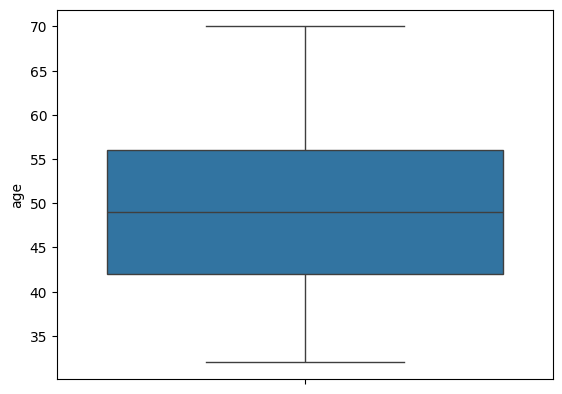

In [1240]:
make_boxplot(df['age'])

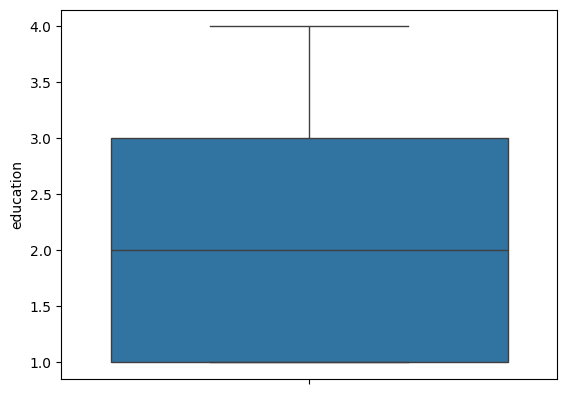

In [1241]:
make_boxplot(df['education'])

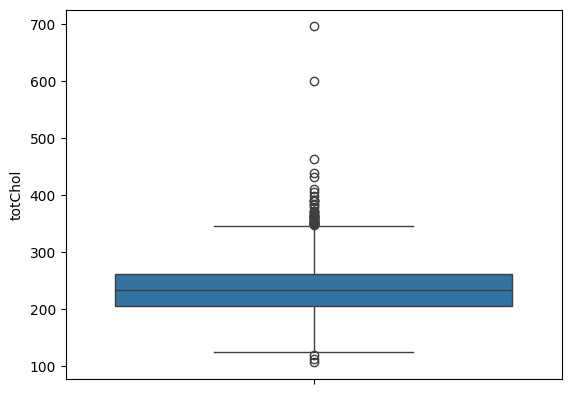

In [1242]:
make_boxplot(df['totChol'])

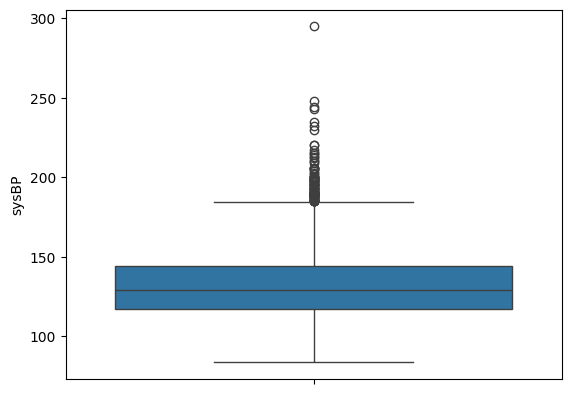

In [1243]:
make_boxplot(df['sysBP'])

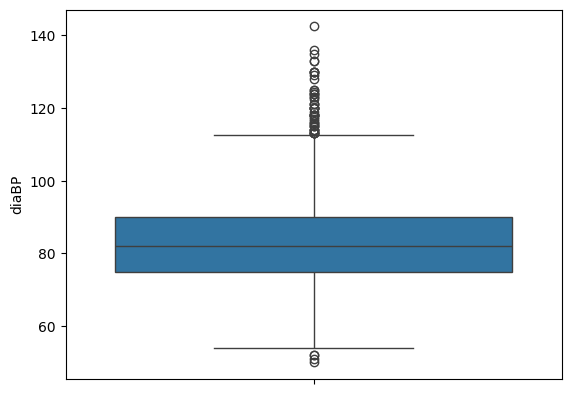

In [1244]:
make_boxplot(df['diaBP'])

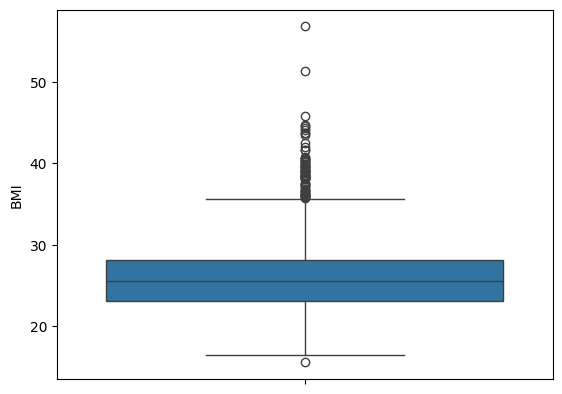

In [1245]:
make_boxplot(df['BMI'])

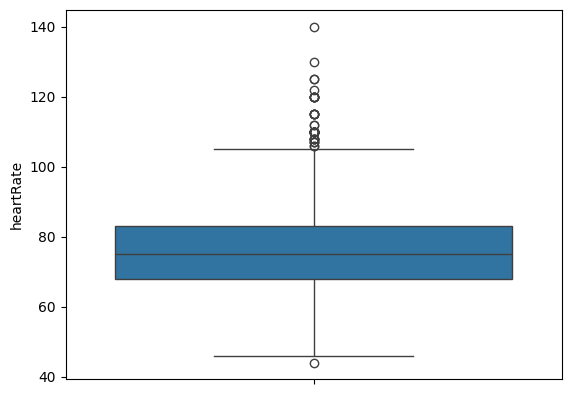

In [1246]:
make_boxplot(df['heartRate'])

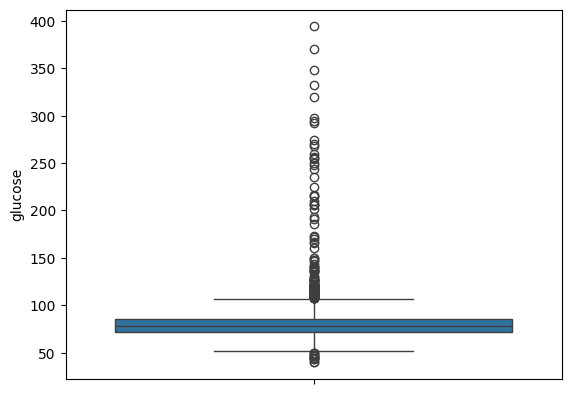

In [1247]:
make_boxplot(df['glucose'])

Total Cholesterol, systolic blood pressure, diabolic blood pressure, BMI, heart rate, and glucose all have outliers. We will winsorize these variables.

In [1248]:
from scipy.stats.mstats import winsorize
# Now, we will winsorize the data
# The limits argument specifies the proportion of data to winsorize at each end
# Winsorization replaces the bottom and top 2% of data w/ the 2nd and 98th percentile values, reducing extreme outliers
cols = ['totChol', 'diaBP', 'heartRate']
for c in cols:
    df[c] = winsorize(df[c], limits=[0.02, 0.02])

In [1249]:
col = ['BMI']
for c in col:
    df[c] = winsorize(df[c], limits=[0.03, 0.03])

In [1250]:
col = ['sysBP']
for c in col:
    df[c] = winsorize(df[c], limits=[0.04, 0.04])

In [1251]:
col = ['glucose']
for c in col:
    df[c] = winsorize(df[c], limits=[0.06, 0.06])

In [1252]:
# 2nd and 98th percentiles work for totChol
# 2nd and 98th percentiles work for diaBP
# 2nd and 98th percentiles work for heartRate
# 3rd and 97th percentiles work for BMI
# 4th and 96th percentiles work for sysBP
# 6th and 94th percentiles work for glucose

# 'Work' means gets rid of all the outliers -- wanted to change as little data as possible

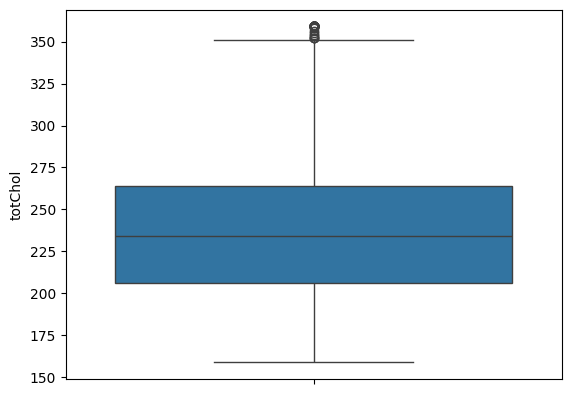

In [1253]:
make_boxplot(df['totChol'])

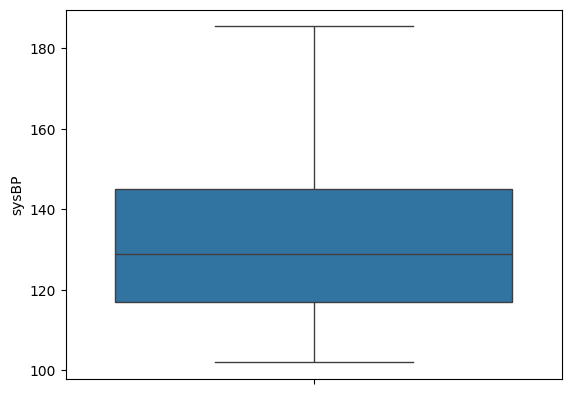

In [1254]:
make_boxplot(df['sysBP'])

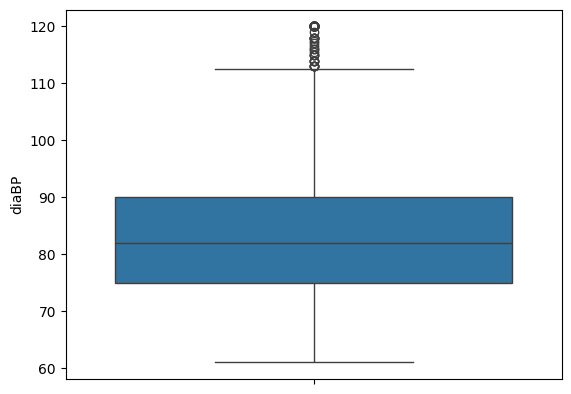

In [1255]:
make_boxplot(df['diaBP'])

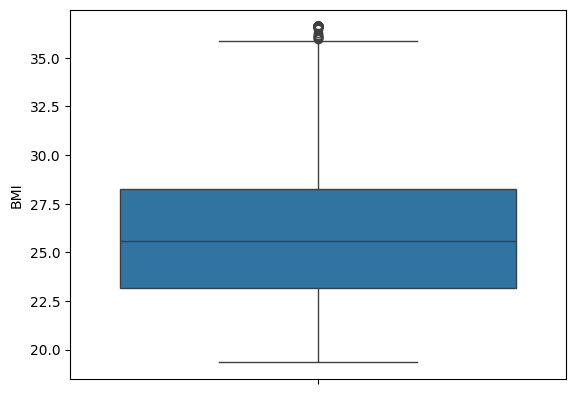

In [1256]:
make_boxplot(df['BMI'])

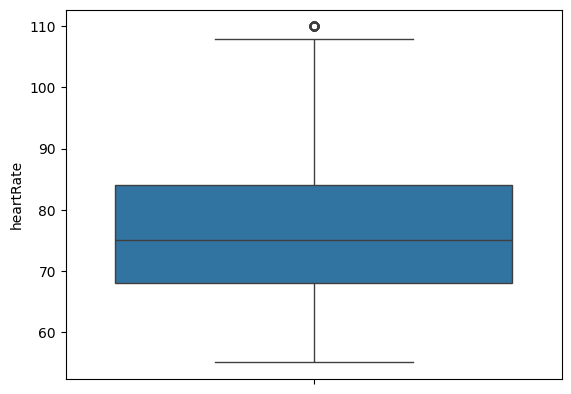

In [1257]:
make_boxplot(df['heartRate'])

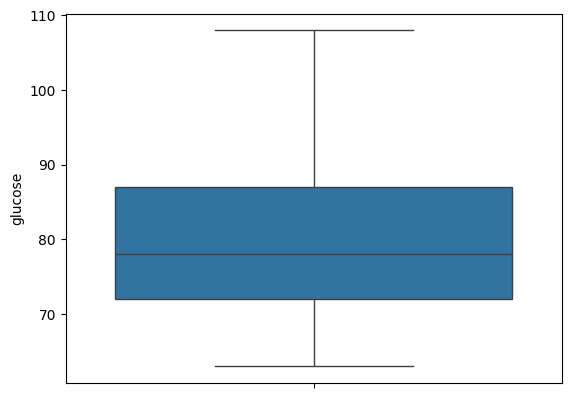

In [1258]:
make_boxplot(df['glucose'])

In [1260]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
df.to_csv('/content/drive/My Drive/4th Year/IntroML/cleaned_chd.csv')

Mounted at /content/drive
